### Importing Libraries



In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing dataset

In [44]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df=pd.read_csv("/content/drive/MyDrive/datasets/pulsar_stars.csv")

#### EDA

In [46]:
df.shape

(17898, 9)

In [47]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [48]:
df.columns = df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [49]:
df.columns= ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [50]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [51]:
df["target_class"].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [52]:
#Checking for missing values in the variabels
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

Text(0, 0.5, 'DM-SNR Skewness')

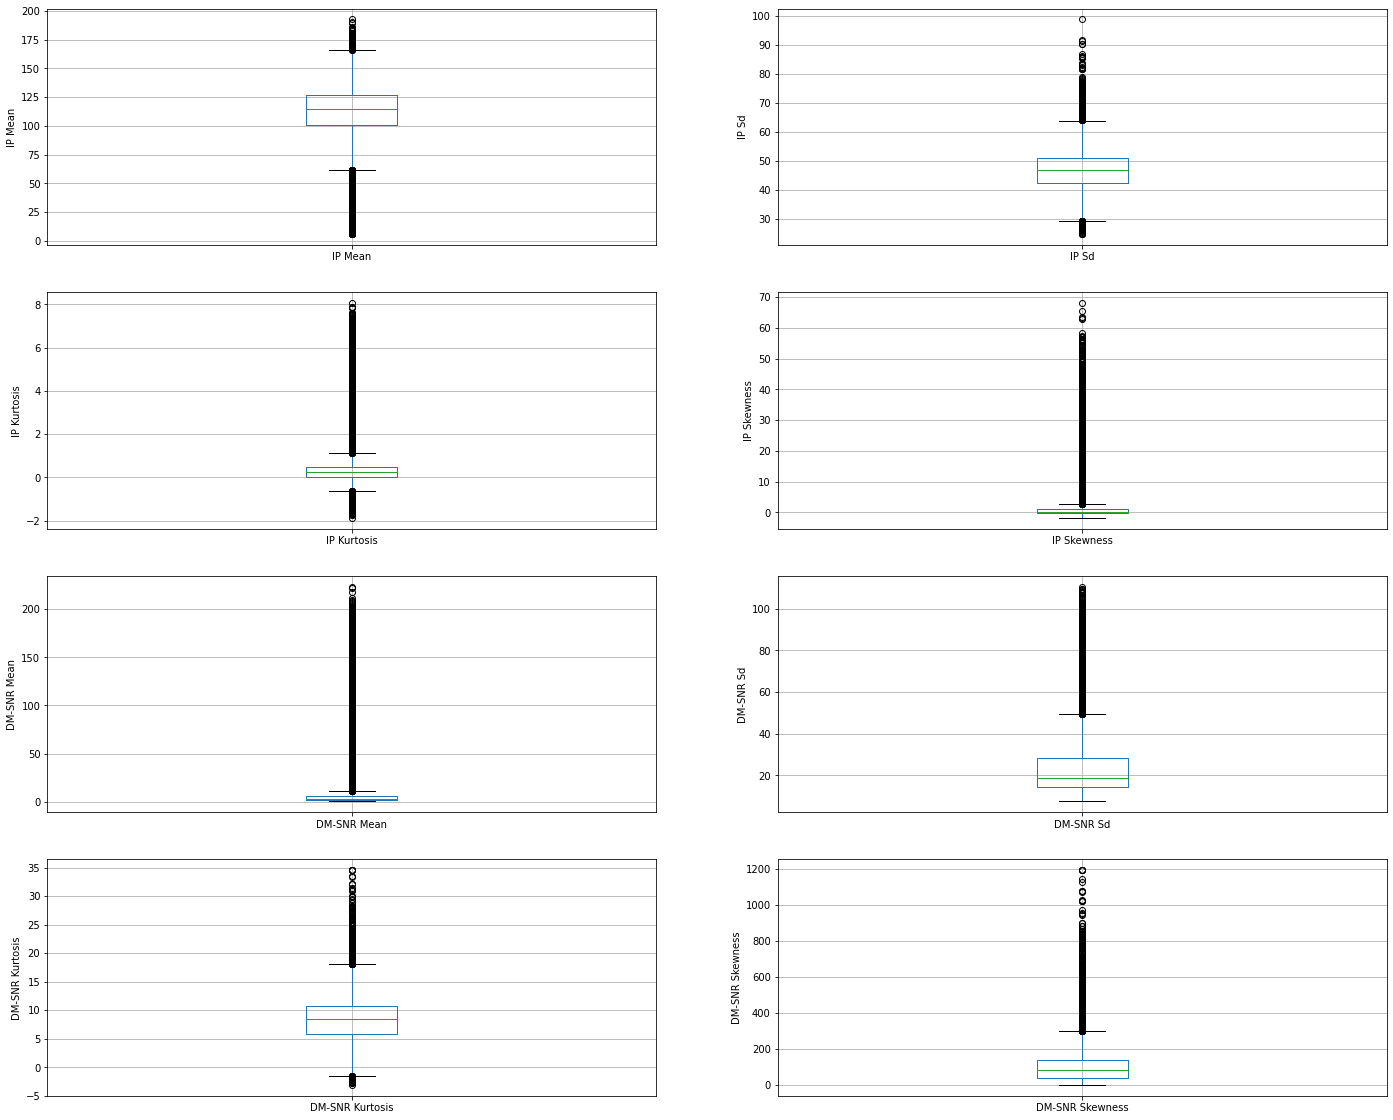

In [53]:
#Checking for outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

There are lot of outliers in these variables and also the variables are skewed

#### Spliting the dataset 

In [54]:
X= df.drop(['target_class'], axis=1)

y=df['target_class']

from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2 , random_state=0)

In [55]:
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

### Feature Scaling

In [56]:
cols= X_train.columns

In [57]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [58]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.986604e-16,-6.757488e-16,2.125527e-17,3.581784e-17,-2.205248e-17,-1.583840e-16,-9.700300e-18,1.214786e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


### Running SVM with default hyperparameters

In [59]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
svc=SVC()

svc.fit(X_train, y_train)

y_predicted = svc.predict(X_test)

In [60]:
print('Model accuracy score with default hyperparameters:',(accuracy_score(y_test, y_predicted)))

Model accuracy score with default hyperparameters: 0.9829608938547486


#### Running SVM with rbf kernel and c=100.0

In [61]:

svc=SVC(C=100.0) 

svc.fit(X_train,y_train)

y_pred_test=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=100.0 :', accuracy_score(y_test, y_pred_test))

Model accuracy score with rbf kernel and C=100.0 : 0.9846368715083799


In [62]:
y_pred_train = svc.predict(X_train)
print('Training-set accuracy score:',(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9829585137589049


#### Checking for Overfitting

In [63]:

print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9830
Test set score: 0.9846


There is no overfitting here as both model accuracy score are quit comperable

### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_test)
conf_matrix= pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
conf_matrix

,Actual Positive:1,Actual Negative:0
Predict Positive:1,3284,22
Predict Negative:0,33,241


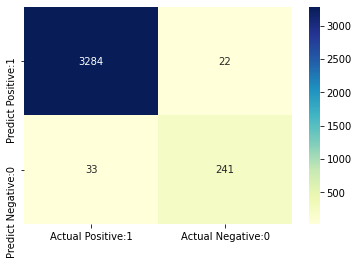

In [65]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')